In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.pytorch import PytorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_whar_cfg

In [2]:
cfg = get_whar_cfg(WHARDatasetID.PAMAP2)
dataset = PytorchAdapter(cfg, override_cache=False)

Overriding cache...
Creating config hash...
Checking windowing...
Loading config hash...
Config hash mismatch.
Checking download...
Download is up-to-date.
Checking common format...


Checking sessions: 100%|██████████| 199/199 [00:00<00:00, 216.37it/s]


Common format is up-to-date.
Parsing...


Caching sessions: 100%|██████████| 199/199 [00:05<00:00, 39.71it/s]


Checking common format...


Checking sessions: 100%|██████████| 199/199 [00:00<00:00, 263.70it/s]


Common format is up-to-date.
Selecting activities...


Caching windows: 100%|██████████| 11129/11129 [00:08<00:00, 1318.78it/s]


subject_ids: [0 1 2 3 4 5 6 7 8]
activity_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [6]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(train_batch_size=32)

train: 8416 | val: 1731 | test: 982


In [7]:
weights = dataset.get_class_weights(train_loader)
print(weights)

{0: 0.16464514930164442, 4: 0.5988153382086644, 8: 0.6153283881737799, 10: 0.6882487978112571, 1: 0.7398974859541613, 3: 0.7584280133304729, 9: 0.7807758000952751, 5: 0.8121863207887633, 2: 0.8153101143302584, 11: 1.225321559109059, 6: 1.2360386572936863, 7: 1.4928213360976563, 12: 3.0721830395053216}


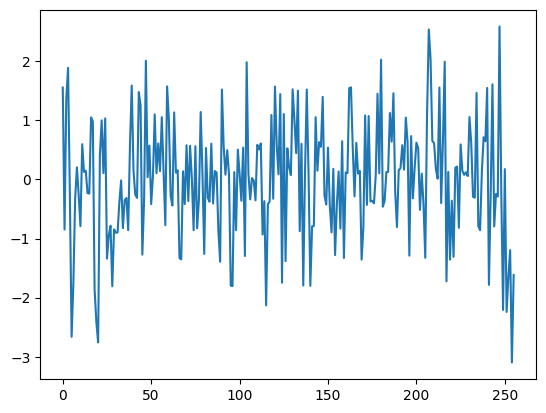

In [10]:
y, x = next(iter(train_loader))

plt.plot(x[0, :, 0])
plt.show()